# Importing

In [1]:
# import libraries

# maths
import scipy.stats as stats
import numpy as np
import pandas as pd
#from pandas.api.types import is_numeric_dtype

# visual
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# machine learning
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.preprocessing import StandardScaler,PolynomialFeatures

# html
#from IPython.display import Image
#from IPython.core.display import HTML

# other
#import re
#import os

In [2]:
# import raw data
raw_path = '../data/raw/'

df_train = pd.read_csv(raw_path + 'train.csv')
df_test = pd.read_csv(raw_path + 'test.csv')

# import cleaning files
clean_path = '../data/clean/'

df_cols = pd.read_csv(clean_path + 'columns.csv',header=None)

# Functions

In [3]:
# convert rating (in letters) to scale (0-1)
def convert_scores(col,scale_type):
    
        col = col.str.lower()
        
        if scale_type == 1:        
            scale = {'na':0/5,'po':1/5,'fa':2/5,'ta':3/5,'gd':4/5,'ex':5/5}
        elif scale_type == 2:
            scale = {'na':0/4,'fa':1/4,'ta':2/4,'gd':3/4,'ex':4/4}
        elif scale_type == 3:
            scale = {'na':0/6,'unf':1/6,'lwq':2/6,'rec':3/6,'blq':4/6,'alq':5/6,'glq':6/6}
        else:
            print(str(scale_type) + ' is invalid scale_type!')
            return col
            
        for key in scale.keys():
                col = col.replace(key, scale[key])
                
        return col

In [4]:
def create_scatterplot(title,data,x,y,hue=None,xlabel=None,ylabel=None):    
        
    plt.figure(figsize=(8,6))
    
    sns.set_style("whitegrid")
    palette = sns.color_palette("bright",n_colors=16)
      
    #sns.regplot(data,x=x,y=y)        
    sns.scatterplot(data=data,x=x,y=y,hue=hue,palette=palette)

    #plt.xlim(min_x,max_x)
    #plt.ylim(min_x,max_x)
                    
    plt.title(title)
    
    if xlabel == None:
        xlabel = x
    if ylabel == None:
        ylabel = y
    
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)

In [5]:
lr = LinearRegression()

def create_lm_model(df,y,cols,cv=5):
    
    X = df.loc[:,cols]
    X = X.values

    model = lr.fit(X,y)
    print('coef: {} intercept: {}'.format(model.coef_,model.intercept_))

    cvs = cross_val_score(model,X,y,cv=5)    
    mean = np.mean(cvs)
    print('cvs:',cvs)
    print('mean:',mean)
    
    return model

# Inspect df_train

In [6]:
print(df_train.columns)

Index(['Id', 'PID', 'MS SubClass', 'MS Zoning', 'Lot Frontage', 'Lot Area',
       'Street', 'Alley', 'Lot Shape', 'Land Contour', 'Utilities',
       'Lot Config', 'Land Slope', 'Neighborhood', 'Condition 1',
       'Condition 2', 'Bldg Type', 'House Style', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Roof Style',
       'Roof Matl', 'Exterior 1st', 'Exterior 2nd', 'Mas Vnr Type',
       'Mas Vnr Area', 'Exter Qual', 'Exter Cond', 'Foundation', 'Bsmt Qual',
       'Bsmt Cond', 'Bsmt Exposure', 'BsmtFin Type 1', 'BsmtFin SF 1',
       'BsmtFin Type 2', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       'Heating', 'Heating QC', 'Central Air', 'Electrical', '1st Flr SF',
       '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath',
       'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr',
       'Kitchen AbvGr', 'Kitchen Qual', 'TotRms AbvGrd', 'Functional',
       'Fireplaces', 'Fireplace Qu', 'Garage Type', 'Garage Yr Blt',
       'G

In [7]:
df_train.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


In [8]:
df_train_info = df_train.describe()
df_train_info

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2051.000000,2.051000e+03,2051.000000,1721.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2029.000000,...,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000,2051.000000
mean,1474.033642,7.135900e+08,57.008776,69.055200,10065.208191,6.112140,5.562165,1971.708922,1984.190151,99.695909,...,93.833740,47.556802,22.571916,2.591419,16.511458,2.397855,51.574354,6.219893,2007.775719,181469.701609
std,843.980841,1.886918e+08,42.824223,23.260653,6742.488909,1.426271,1.104497,30.177889,21.036250,174.963129,...,128.549416,66.747241,59.845110,25.229615,57.374204,37.782570,573.393985,2.744736,1.312014,79258.659352
min,1.000000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,753.500000,5.284581e+08,20.000000,58.000000,7500.000000,5.000000,5.000000,1953.500000,1964.500000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129825.000000
50%,1486.000000,5.354532e+08,50.000000,68.000000,9430.000000,6.000000,5.000000,1974.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,162500.000000
75%,2198.000000,9.071801e+08,70.000000,80.000000,11513.500000,7.000000,6.000000,2001.000000,2004.000000,161.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,2930.000000,9.241520e+08,190.000000,313.000000,159000.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,547.000000,432.000000,508.000000,490.000000,800.000000,17000.000000,12.000000,2010.000000,611657.000000


In [9]:
df_train_list = df_train.dtypes
print(df_train_list)

Id                  int64
PID                 int64
MS SubClass         int64
MS Zoning          object
Lot Frontage      float64
Lot Area            int64
Street             object
Alley              object
Lot Shape          object
Land Contour       object
Utilities          object
Lot Config         object
Land Slope         object
Neighborhood       object
Condition 1        object
Condition 2        object
Bldg Type          object
House Style        object
Overall Qual        int64
Overall Cond        int64
Year Built          int64
Year Remod/Add      int64
Roof Style         object
Roof Matl          object
Exterior 1st       object
Exterior 2nd       object
Mas Vnr Type       object
Mas Vnr Area      float64
Exter Qual         object
Exter Cond         object
                   ...   
Half Bath           int64
Bedroom AbvGr       int64
Kitchen AbvGr       int64
Kitchen Qual       object
TotRms AbvGrd       int64
Functional         object
Fireplaces          int64
Fireplace Qu

In [10]:
# check number of nulls in rows
null_rows_train = df_train.isnull().sum(axis=1)
null_rows_train.sort_values(ascending=False,inplace=True)
null_rows_train.head(20)

#sns.distplot(null_rows_train)

114     16
580     15
437     15
1327    15
2010    15
1594    15
1428    15
1098    14
700     14
256     14
276     12
1007    11
1049    11
737     11
514     11
1211    11
616     11
1372    11
334     11
1125    11
dtype: int64

# Clean df_train

In [11]:
# rename columns
df_train.columns = df_cols[1]

In [12]:
# toggle this to create models with/without outliers
remove_outliers = True

if remove_outliers == True:
    
    print('before:',len(df_train))
    
    mask_no_outliers = df_train['ground_total_area'] > 4000
    df_train = df_train[~mask_no_outliers]
    
    print('after:',len(df_train))

before: 2051
after: 2049


In [13]:
# convert columns with rating (1-10) to scale (0-1)

df_train['house_qual'] = df_train['house_qual'] / 10
df_train['house_cond'] = df_train['house_cond'] / 10

In [14]:
# convert columns with rating (in letters) to scale (0-1)
cols = ['exterior_qual','exterior_cond','bsmt_qual','bsmt_cond','heating_cond',
        'kitchen_qual','fireplace_score','garage_qual','garage_cond']

for col in cols:    
    # df_train[col + '_2'] = convert_scores(df_train[col],scale_type=1) # test first before overwrite
    df_train[col] = convert_scores(df_train[col],scale_type=1) # overwrite

In [15]:
# convert columns with rating (in letters) to scale (0-1)
cols = ['pool_qual']

for col in cols:    
    # df_train[col + '_2'] = convert_scores(df_train[col],scale_type=4) # test first before overwrite
    df_train[col] = convert_scores(df_train[col],scale_type=2) # overwrite

In [16]:
# convert columns with rating (in letters) to scale (0-1)
cols = ['bsmt_type1_score','bsmt_type2_score']

for col in cols:    
    # df_train[col + '_2'] = convert_scores(df_train[col],scale_type=2) # test first before overwrite
    df_train[col] = convert_scores(df_train[col],scale_type=3) # overwrite

In [17]:
df_train.head()

1,id,pid,lot_subclass,lot_zone,lot_frontage,lot_area,access_road,access_alley,lot_shape,land_contour,...,porch_screen_area,pool_area,pool_qual,fence_num,misc_feature,misc_value,sold_month,sold_year,sale_type,sale_price
0,109,533352170,60,RL,NaN,13517,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,130500
1,544,531379050,60,RL,43.0,11492,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,4,2009,WD,220000
2,153,535304180,20,RL,68.0,7922,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,1,2010,WD,109000
3,318,916386060,60,RL,73.0,9802,Pave,NaN,Reg,Lvl,...,0,0,NaN,NaN,NaN,0,4,2010,WD,174000
4,255,906425045,50,RL,82.0,14235,Pave,NaN,IR1,Lvl,...,0,0,NaN,NaN,NaN,0,3,2010,WD,138500


# Inspect df_test

# Clean df_test 

# EDA

In [18]:
# df_train heatmap
#fig, ax = plt.subplots(figsize=(20, 10))
#sns.heatmap(df_train.corr())

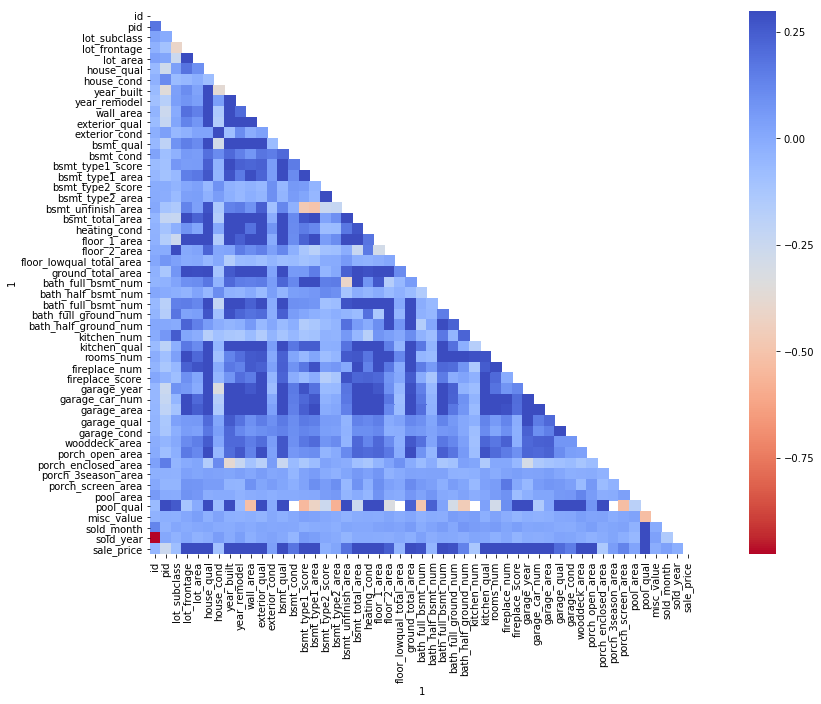

In [19]:
# df_train heatmap (half)
corr = df_train.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

fig, ax = plt.subplots(figsize=(20, 10))
sns.heatmap(corr, mask=mask, vmax=.3, square=True,cmap="coolwarm_r")    

#with sns.axes_style("whitegrid"):
    #ax = sns.heatmap(corr, mask=mask, vmax=.3, square=True,cmap="RdBu")

In [20]:
# inspect correlation matrix
df_corr = df_train.corr()
df_corr['sale_price'].sort_values(ascending=False)

1
sale_price                  1.000000
house_qual                  0.803462
ground_total_area           0.719463
exterior_qual               0.715048
kitchen_qual                0.694295
bsmt_qual                   0.680013
bsmt_total_area             0.664819
garage_area                 0.655483
garage_car_num              0.648667
floor_1_area                0.648252
year_built                  0.572405
year_remodel                0.550872
bath_full_bsmt_num          0.538225
garage_year                 0.534514
wall_area                   0.520023
pool_qual                   0.514969
rooms_num                   0.509775
fireplace_num               0.473783
heating_cond                0.458636
bsmt_type1_area             0.445764
lot_frontage                0.355530
porch_open_area             0.338545
wooddeck_area               0.327629
bsmt_type1_score            0.324933
fireplace_score             0.322101
lot_area                    0.303744
bath_full_bsmt_num          0.284763

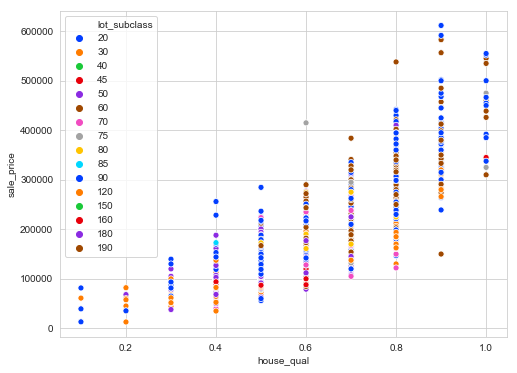

In [21]:
data = df_train
x = 'house_qual'
y = 'sale_price'
hue = 'lot_subclass'

create_scatterplot('',data,x,y,hue) 

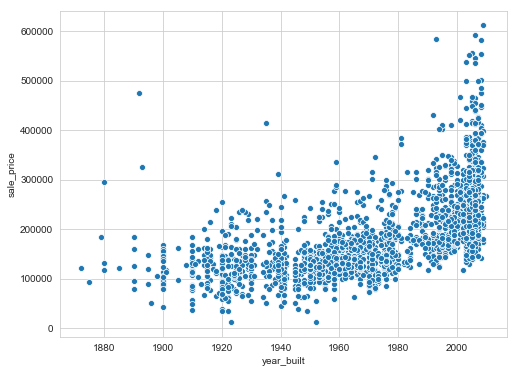

In [22]:
data = df_train
x = 'year_built'
y = 'sale_price'

create_scatterplot('',data,x,y)

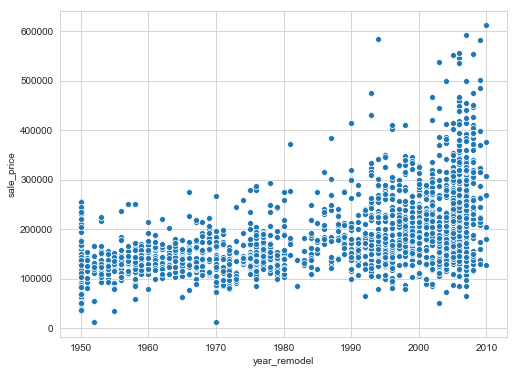

In [23]:
data = df_train
x = 'year_remodel'
y = 'sale_price'

create_scatterplot('',data,x,y)

found 2 outliers (bottom right)


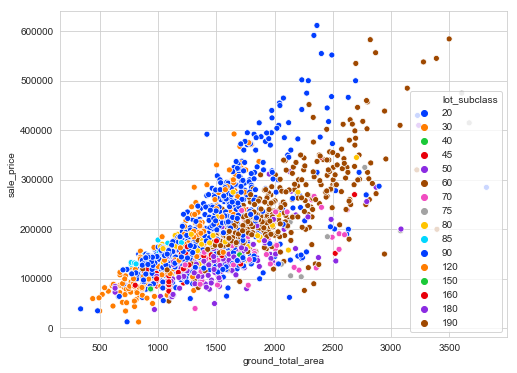

In [24]:
data = df_train
x = 'ground_total_area'
y = 'sale_price'
hue = 'lot_subclass'

create_scatterplot('',data,x,y,hue)
print('found 2 outliers (bottom right)')

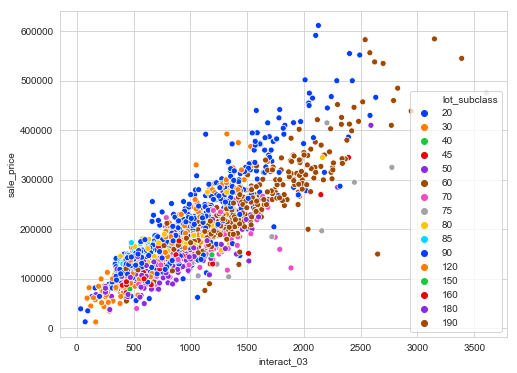

In [40]:
data = df_train
x = 'interact_03' # df_train['house_qual'] * df_train['ground_total_area']
y = 'sale_price'
hue = 'lot_subclass'

create_scatterplot('',data,x,y,hue)
print('less variance compared to above plot')

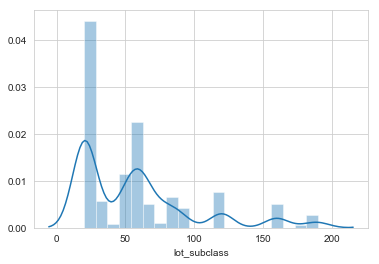

In [26]:
x = df_train['lot_subclass']
sns.distplot(x, bins=20)

# Modelling

In [27]:
# init
y_train = df_train['sale_price']

In [28]:
# lr_model_01
cols = ['house_qual']
lr_model_01 = create_lm_model(df_train,y_train,cols,cv=5)

coef: [448109.24858466] intercept: -92241.594694269
cvs: [0.63621737 0.65436125 0.66964685 0.6448892  0.6170768 ]
mean: 0.6444382937193535


In [29]:
# lr_model_02
cols = ['ground_total_area']
lr_model_02 = create_lm_model(df_train,y_train,cols,cv=5)

coef: [117.44014077] intercept: 5841.011453641229
cvs: [0.49805863 0.48079625 0.50204936 0.53872008 0.55811904]
mean: 0.5155486704169734


In [30]:
# lr_model_03
cols = ['year_built']
lr_model_03 = create_lm_model(df_train,y_train,cols,cv=5)

coef: [1504.38960733] intercept: -2784686.10328533
cvs: [0.32328019 0.35308495 0.26083223 0.37859706 0.32152391]
mean: 0.3274636656681917


In [31]:
# lr_model_04
cols = ['year_remodel']
lr_model_04 = create_lm_model(df_train,y_train,cols,cv=5)

coef: [2076.8462123] intercept: -3939329.5013914597
cvs: [0.25320325 0.33926255 0.28226149 0.34917944 0.29384438]
mean: 0.3035502219653282


In [32]:
# lr_model_05
cols = ['year_built','year_remodel']
lr_model_05 = create_lm_model(df_train,y_train,cols,cv=5)

coef: [ 982.54238351 1190.84986536] intercept: -4118618.0786760454
cvs: [0.36447731 0.42319998 0.33697805 0.44300296 0.37325667]
mean: 0.38818299156381864


In [33]:
# lr_model_06
cols = ['house_qual','ground_total_area']
lr_model_06 = create_lm_model(df_train,y_train,cols,cv=5)

coef: [3.25216167e+05 6.36678165e+01] intercept: -112392.87590829044
cvs: [0.724176   0.75615209 0.76553531 0.75813188 0.73824384]
mean: 0.7484478238032759


In [34]:
# lr_model_07
cols = ['house_qual','year_remodel']
lr_model_07 = create_lm_model(df_train,y_train,cols,cv=5)

coef: [407771.24006116    466.85017534] intercept: -993910.1875825346
cvs: [0.6470268  0.66596438 0.66909386 0.6586026  0.63085482]
mean: 0.6543084920629025


In [35]:
# lr_model_08
cols = ['house_qual','ground_total_area','exterior_qual','kitchen_qual','floor_1_area']
lr_model_08 = create_lm_model(df_train,y_train,cols,cv=5)

coef: [1.75901452e+05 4.76132645e+01 1.15245731e+05 8.02205975e+04
 4.62173234e+01] intercept: -185708.8836816937
cvs: [0.79590994 0.83564437 0.83869264 0.81517557 0.8148149 ]
mean: 0.8200474854686721


In [41]:
# lr_model_09
cols = ['pid']
lr_model_09 = create_lm_model(df_train,y_train,cols,cv=5)

coef: [-0.00010719] intercept: 257950.57966537407
cvs: [0.07859961 0.08088515 0.02306569 0.0618984  0.06714332]
mean: 0.062318433263048555


In [36]:
# lr_model_interact_01
df_train['interact_01'] = df_train['year_built'] * df_train['year_remodel']
cols = ['interact_01']
lr_model_interact_01 = create_lm_model(df_train,y_train,cols,cv=5)

coef: [0.53862625] intercept: -1925910.7809940116
cvs: [0.36889134 0.42245065 0.3351763  0.44312419 0.37428312]
mean: 0.3887851199031435


In [37]:
# lr_model_interact_02
df_train['interact_02'] = df_train['house_qual'] * df_train['year_remodel']
cols = ['interact_02']
lr_model_interact_02 = create_lm_model(df_train,y_train,cols,cv=5)

coef: [220.991353] intercept: -86747.73209100898
cvs: [0.64443168 0.66203738 0.67403447 0.65245033 0.62601234]
mean: 0.6517932416526349


In [51]:
# lr_model_interact_03
df_train['interact_03'] = df_train['house_qual'] * df_train['ground_total_area']
cols = ['interact_03']
lr_model_interact_03 = create_lm_model(df_train,y_train,cols,cv=5)

coef: [145.55222376] intercept: 42835.381937714264
cvs: [0.73521147 0.77447858 0.76391127 0.76123261 0.76977714]
mean: 0.7609222150474362


# Output Clean Data

In [39]:
# output to csv

clean_path = '../data/clean/'

df_corr.to_csv(clean_path + 'df_corr.csv')
df_train.to_csv(clean_path + 'df_train_clean.csv')